Regression:

Features -> Age, Fare, Cabin (deck level), Sex, Class

Then I removed the features one at a time to see what the best combination was

Linear Regression
Final Features -> Class, Sex, Age 

Non-linear Regression
Features -> Age, Fare, Cabin (deck level), Sex, Class


GridSearch to tune parameters

Run test data on best model
1) Linear Regression
2) Polynomial GridSearch

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
file_path = '/Users/rianarang/Desktop/Programming/syde543-titanic/Titanic-Dataset.csv'  
df = pd.read_csv(file_path)

# Preprocessing selected features
df['Age'].fillna(df['Age'].median(), inplace=True)       # Fill missing Age with median
df['Fare'].fillna(df['Fare'].median(), inplace=True)     # Fill missing Fare with median
df['Cabin'].fillna('U', inplace=True)                    # Replace missing cabins with 'U'
# Cabin preprocessing: Extract first letter of cabin number (deck level)
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})       # Encode 'Sex' (0 = male, 1 = female)
df['Cabin'] = df['Cabin'].astype('category').cat.codes    # Encode 'Cabin' as numerical codes

# Select features and target
features = ['Pclass', 'Sex', 'Age']
X = df[features]
y = df['Survived']

# Split the data into training and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split training data into training and validation sets (80-20)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Define the Logistic Regression model and GridSearchCV parameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'penalty': ['l1', 'l2'],                # Regularization type
    'solver': ['liblinear']                 # Required for L1 regularization
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_final, y_train_final)

# Display the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Overall test accuracy
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Overall Test Accuracy: {test_accuracy:.4f}")

# Combine test features and labels for group-specific evaluation
X_test_combined = pd.concat([X_test, y_test], axis=1)

# Evaluate group-specific accuracy
def evaluate_group_accuracy(model, X_test_combined):
    groups = {
        "Male": X_test_combined['Sex'] == 0,
        "Female": X_test_combined['Sex'] == 1,
        "Class 1": X_test_combined['Pclass'] == 1,
        "Class 2": X_test_combined['Pclass'] == 2,
        "Class 3": X_test_combined['Pclass'] == 3,
    }
    
    print("\nGroup-Specific Accuracy:")
    for group_name, condition in groups.items():
        X_group = X_test_combined[condition][features]
        y_group = X_test_combined[condition]['Survived']
        if len(y_group) == 0:  # Skip empty groups
            print(f"{group_name}: No data points.")
            continue
        y_pred_group = model.predict(X_group)
        group_accuracy = accuracy_score(y_group, y_pred_group)
        print(f"Accuracy for {group_name}: {group_accuracy:.4f}")

# Call the group accuracy function
evaluate_group_accuracy(best_model, X_test_combined)


Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Validation Accuracy: 0.7902
Overall Test Accuracy: 0.7821

Group-Specific Accuracy:
Accuracy for Male: 0.7966
Accuracy for Female: 0.7541
Accuracy for Class 1: 0.7333
Accuracy for Class 2: 0.8824
Accuracy for Class 3: 0.7700


/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_19662/2818384458.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)       # Fill missing Age with median
/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_19662/2818384458.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate o

Polynomial Regression

In [2]:
# Import required libraries
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split

# Load and preprocess the dataset (same as before)
file_path = '/Users/rianarang/Desktop/Programming/syde543-titanic/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

# Preprocessing
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Cabin'].fillna('U', inplace=True)
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Cabin'] = df['Cabin'].astype('category').cat.codes

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin']
X = df[features]
y = df['Survived']

# Train-validation-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Transform features into polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)  # Degree=2 for quadratic features
X_train_poly = poly.fit_transform(X_train_final)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Grid search for best Logistic Regression on polynomial features
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=2000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_poly, y_train_final)

# Best model evaluation
print("Best Hyperparameters for Polynomial Logistic Regression:", grid_search.best_params_)
best_model_poly = grid_search.best_estimator_

# Validation accuracy
y_val_pred = best_model_poly.predict(X_val_poly)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy (Non-Linear Regression): {val_accuracy:.4f}")

# Combine validation features and labels for group-specific evaluation
X_val_combined = pd.DataFrame(X_val, columns=features)
X_val_combined['Survived'] = y_val

# Evaluate group-specific accuracy on validation data
def evaluate_group_accuracy(model, X_combined, poly):
    groups = {
        "Male": X_combined['Sex'] == 0,
        "Female": X_combined['Sex'] == 1,
        "Class 1": X_combined['Pclass'] == 1,
        "Class 2": X_combined['Pclass'] == 2,
        "Class 3": X_combined['Pclass'] == 3,
        "Class 1 Male": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 0),
        "Class 1 Female": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 1),
        "Class 2 Male": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 0),
        "Class 2 Female": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 1),
        "Class 3 Male": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 0),
        "Class 3 Female": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 1),
    }
    
    print("\nGroup-Specific Accuracy (Validation Data):")
    for group_name, condition in groups.items():
        X_group = X_combined[condition][features]
        y_group = X_combined[condition]['Survived']
        
        if len(y_group) == 0:  # Skip empty groups
            print(f"{group_name}: No data points.")
            continue
        
        # Transform the group data using PolynomialFeatures
        X_group_poly = poly.transform(X_group)
        
        # Predict using the model
        y_pred_group = model.predict(X_group_poly)
        
        # Calculate accuracy
        group_accuracy = accuracy_score(y_group, y_pred_group)
        print(f"Accuracy for {group_name}: {group_accuracy:.4f}")

# Call the group accuracy function with validation data
evaluate_group_accuracy(best_model_poly, X_val_combined, poly)


# Test accuracy
y_test_pred = best_model_poly.predict(X_test_poly)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy (Non-Linear Regression): {test_accuracy:.4f}")

/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_19662/663538436.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_19662/663538436.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

Best Hyperparameters for Polynomial Logistic Regression: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Validation Accuracy (Non-Linear Regression): 0.7902

Group-Specific Accuracy (Validation Data):
Accuracy for Male: 0.8043
Accuracy for Female: 0.7647
Accuracy for Class 1: 0.7353
Accuracy for Class 2: 0.9333
Accuracy for Class 3: 0.7595
Accuracy for Class 1 Male: 0.5294
Accuracy for Class 1 Female: 0.9412
Accuracy for Class 2 Male: 0.9375
Accuracy for Class 2 Female: 0.9286
Accuracy for Class 3 Male: 0.8475
Accuracy for Class 3 Female: 0.5000
Test Accuracy (Non-Linear Regression): 0.7598


With interaction feature

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Add interaction features
df['Sex_Pclass'] = df['Sex'] * df['Pclass']

# Select updated features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Sex_Pclass']
X = df[features]
y = df['Survived']

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_resampled)
X_val_poly = poly.transform(X_val)

# Grid search for Logistic Regression
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid_search = GridSearchCV(LogisticRegression(max_iter=2000, class_weight='balanced'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_poly, y_train_resampled)

# Best model
best_model_poly = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate group-specific accuracy
y_val_pred = best_model_poly.predict(X_val_poly)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy (Non-Linear Regression): {val_accuracy:.4f}")

# Combine validation features and labels for group-specific evaluation
X_val_combined = pd.DataFrame(X_val, columns=features)
X_val_combined['Survived'] = y_val

# Evaluate group-specific accuracy on validation data
def evaluate_group_accuracy(model, X_combined, poly):
    groups = {
        "Male": X_combined['Sex'] == 0,
        "Female": X_combined['Sex'] == 1,
        "Class 1": X_combined['Pclass'] == 1,
        "Class 2": X_combined['Pclass'] == 2,
        "Class 3": X_combined['Pclass'] == 3,
        "Class 1 Male": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 0),
        "Class 1 Female": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 1),
        "Class 2 Male": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 0),
        "Class 2 Female": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 1),
        "Class 3 Male": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 0),
        "Class 3 Female": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 1),
    }
    
    print("\nGroup-Specific Accuracy (Validation Data):")
    for group_name, condition in groups.items():
        X_group = X_combined[condition][features]
        y_group = X_combined[condition]['Survived']
        
        if len(y_group) == 0:  # Skip empty groups
            print(f"{group_name}: No data points.")
            continue
        
        # Transform the group data using PolynomialFeatures
        X_group_poly = poly.transform(X_group)
        
        # Predict using the model
        y_pred_group = model.predict(X_group_poly)
        
        # Calculate accuracy
        group_accuracy = accuracy_score(y_group, y_pred_group)
        print(f"Accuracy for {group_name}: {group_accuracy:.4f}")

# Call the group accuracy function with validation data
evaluate_group_accuracy(best_model_poly, X_val_combined, poly)


Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Validation Accuracy (Non-Linear Regression): 0.7318

Group-Specific Accuracy (Validation Data):
Accuracy for Male: 0.7034
Accuracy for Female: 0.7869
Accuracy for Class 1: 0.5556
Accuracy for Class 2: 0.8824
Accuracy for Class 3: 0.7600
Accuracy for Class 1 Male: 0.3667
Accuracy for Class 1 Female: 0.9333
Accuracy for Class 2 Male: 0.8125
Accuracy for Class 2 Female: 0.9444
Accuracy for Class 3 Male: 0.8194
Accuracy for Class 3 Female: 0.6071


SVM:

In [4]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV


# Load and preprocess the dataset
file_path = '/Users/rianarang/Desktop/Programming/syde543-titanic/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

# Preprocessing
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Cabin'].fillna('U', inplace=True)
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Cabin'] = df['Cabin'].astype('category').cat.codes
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Title'] = df['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Don', 'Jonkheer'], 'Other')
df['Title'] = df['Title'].astype('category').cat.codes
df['Sex_Pclass'] = df['Sex'] * df['Pclass']

# Update features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Sex_Pclass', 'Title', 'FamilySize']

X = df[features]
y = df['Survived']

# Train-validation-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train_final)

# Standardize features (important for SVM)
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)

# Grid search for SVM
param_grid = {
    'C': [0.1, 1, 10],  # Reduced values
    'kernel': ['linear', 'rbf'],  # Focus on the best-performing kernels
    'gamma': ['scale', 0.1, 1]  # Simplified gamma range
}


svm = SVC()
# Randomized Search for SVM
random_search = RandomizedSearchCV(
    SVC(), param_distributions=param_grid, n_iter=20, cv=5, scoring='accuracy', verbose=1, random_state=42
)
random_search.fit(X_train_resampled_scaled, y_train_resampled)

# Best model
best_svm = random_search.best_estimator_
print("Best Hyperparameters for SVM:", random_search.best_params_)
# Validation accuracy
y_val_pred = best_svm.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy (SVM): {val_accuracy:.4f}")

# Combine validation features and labels for group-specific evaluation
X_val_combined = pd.DataFrame(X_val, columns=features)
X_val_combined['Survived'] = y_val

# Group-Specific Accuracy on Test Data
def evaluate_group_accuracy(model, X_combined, scaler):
    groups = {
        "Male": X_combined['Sex'] == 0,
        "Female": X_combined['Sex'] == 1,
        "Class 1": X_combined['Pclass'] == 1,
        "Class 2": X_combined['Pclass'] == 2,
        "Class 3": X_combined['Pclass'] == 3,
        "Class 1 Male": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 0),
        "Class 1 Female": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 1),
        "Class 2 Male": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 0),
        "Class 2 Female": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 1),
        "Class 3 Male": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 0),
        "Class 3 Female": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 1),
    }
    
    print("\nGroup-Specific Accuracy:")
    for group_name, condition in groups.items():
        X_group = X_combined[condition][features]
        y_group = X_combined[condition]['Survived']
        
        if len(y_group) == 0:  # Skip empty groups
            print(f"{group_name}: No data points.")
            continue
        
        # Scale the group data
        X_group_scaled = scaler.transform(X_group)
        
        # Predict using the model
        y_pred_group = model.predict(X_group_scaled)
        
        # Calculate accuracy
        group_accuracy = accuracy_score(y_group, y_pred_group)
        print(f"Accuracy for {group_name}: {group_accuracy:.4f}")

# Call the group accuracy function with validation data
evaluate_group_accuracy(best_svm, X_val_combined, scaler)


# RUN THIS MODEL ON THE TEST DATA TO SEE HOW IT PERFORMS
# Standardize the test data using the previously fitted scaler
X_test_scaled = scaler.transform(X_test)

# Predict using the best SVM model
y_test_pred = best_svm.predict(X_test_scaled)

# Evaluate overall test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy (SVM): {test_accuracy:.4f}")

# Combine test features and labels for group-specific evaluation
X_test_combined = pd.DataFrame(X_test, columns=features)
X_test_combined['Survived'] = y_test

# Evaluate on test data
print("\nTest Accuracy Results:")
evaluate_group_accuracy(best_svm, X_test_combined, scaler)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_19662/2142705156.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_19662/2142705156.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

Best Hyperparameters for SVM: {'kernel': 'rbf', 'gamma': 1, 'C': 10}
Validation Accuracy (SVM): 0.8322

Group-Specific Accuracy:
Accuracy for Male: 0.8370
Accuracy for Female: 0.8235
Accuracy for Class 1: 0.8235
Accuracy for Class 2: 0.9333
Accuracy for Class 3: 0.7975
Accuracy for Class 1 Male: 0.7059
Accuracy for Class 1 Female: 0.9412
Accuracy for Class 2 Male: 0.9375
Accuracy for Class 2 Female: 0.9286
Accuracy for Class 3 Male: 0.8475
Accuracy for Class 3 Female: 0.6500
Test Accuracy (SVM): 0.7821

Test Accuracy Results:

Group-Specific Accuracy:
Accuracy for Male: 0.7881
Accuracy for Female: 0.7705
Accuracy for Class 1: 0.6222
Accuracy for Class 2: 0.9118
Accuracy for Class 3: 0.8100
Accuracy for Class 1 Male: 0.5000
Accuracy for Class 1 Female: 0.8667
Accuracy for Class 2 Male: 0.8750
Accuracy for Class 2 Female: 0.9444
Accuracy for Class 3 Male: 0.8889
Accuracy for Class 3 Female: 0.6071


CLUSTERING


Clustering Results for k=2:
Confusion Matrix:
                Predicted 0  Predicted 1
Ground Truth 0           91           19
Ground Truth 1           47           22
Accuracy: 0.6313

Clustering Results for k=3:
Confusion Matrix:
                Predicted 0  Predicted 1
Ground Truth 0           77           33
Ground Truth 1           15           54
Accuracy: 0.7318

Clustering Results for k=4:
Confusion Matrix:
                Predicted 0  Predicted 1
Ground Truth 0           81           29
Ground Truth 1           15           54
Accuracy: 0.7542

Clustering Results for k=2:
Confusion Matrix:
                Predicted 0  Predicted 1
Ground Truth 0           91           19
Ground Truth 1           47           22
Accuracy: 0.6313


/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_19662/2941646576.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_19662/2941646576.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

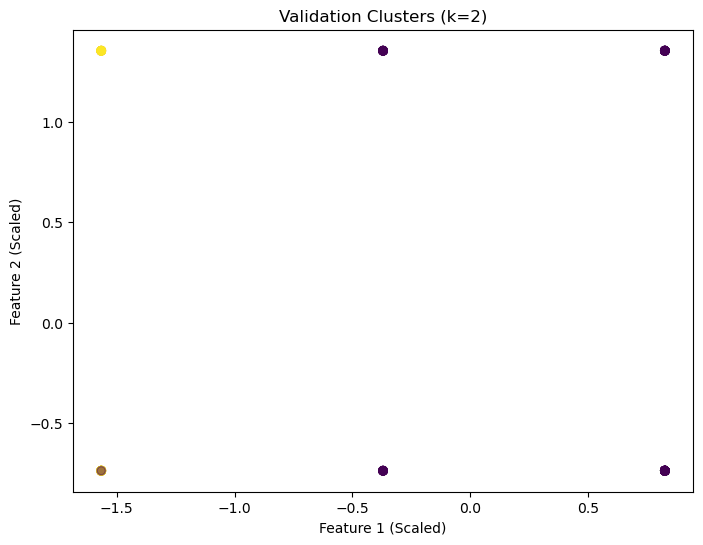

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and preprocess the dataset
file_path = '/Users/rianarang/Desktop/Programming/syde543-titanic/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

# Preprocessing
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Cabin'].fillna('U', inplace=True)
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Cabin'] = df['Cabin'].astype('category').cat.codes
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Title'] = df['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Don', 'Jonkheer'], 'Other')
df['Title'] = df['Title'].astype('category').cat.codes
df['Sex_Pclass'] = df['Sex'] * df['Pclass']

# Features for clustering
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'FamilySize', 'Sex_Pclass']
X = df[features]
y = df['Survived']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Function to evaluate clustering
def evaluate_clustering(k, X, y_true):
    # K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    # Confusion matrix
    cm = confusion_matrix(y_true, cluster_labels)
    cluster_to_class = {}
    
    # Dynamically adjust rows for unique ground truth labels
    unique_classes = [f"Ground Truth {cls}" for cls in np.unique(y_true)]
    
    # Map clusters to ground truth classes
    for cluster in range(k):
        most_common_class = np.argmax(cm[:, cluster])
        cluster_to_class[cluster] = most_common_class
    
    # Map predicted clusters to the corresponding classes
    y_pred = [cluster_to_class[label] for label in cluster_labels]
    
    # Recalculate confusion matrix with remapped clusters
    cm_remapped = confusion_matrix(y_true, y_pred)
    
    # Accuracy
    acc = accuracy_score(y_true, y_pred)
    
    # Print results
    print(f"\nClustering Results for k={k}:")
    print("Confusion Matrix:")
    print(pd.DataFrame(cm_remapped, index=unique_classes, columns=["Predicted 0", "Predicted 1"]))
    print(f"Accuracy: {acc:.4f}")
    
    return kmeans, y_pred

# Compare k=2 to other values (e.g., k=3, 4) on validation data
for k in [2, 3, 4]:
    evaluate_clustering(k, X_val, y_val)

# Visualize Clusters for k=2 (2D Projection)
def visualize_clusters(X, y_pred, title="K-Means Clusters"):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.5)
    plt.title(title)
    plt.xlabel("Feature 1 (Scaled)")
    plt.ylabel("Feature 2 (Scaled)")
    plt.show()

# Visualize the validation clusters for k=2
kmeans_model, y_pred = evaluate_clustering(2, X_val, y_val)
visualize_clusters(X_val, kmeans_model.labels_, title="Validation Clusters (k=2)")


Continue with K=4

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and preprocess the dataset
file_path = '/Users/rianarang/Desktop/Programming/syde543-titanic/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

# Preprocessing
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Cabin'].fillna('U', inplace=True)
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Cabin'] = df['Cabin'].astype('category').cat.codes
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Title'] = df['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Don', 'Jonkheer'], 'Other')
df['Title'] = df['Title'].astype('category').cat.codes
df['Sex_Pclass'] = df['Sex'] * df['Pclass']

# Features for clustering
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'FamilySize', 'Sex_Pclass']
X = df[features]
y = df['Survived']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 80-20 Train-Test Split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Further split the 80% training data into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

# Function to evaluate clustering
def evaluate_clustering(k, X, y_true):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    # Match clusters to ground truth classes
    cm = confusion_matrix(y_true, cluster_labels)
    cluster_to_class = {}
    for cluster in range(k):
        most_common_class = np.argmax(cm[:, cluster])
        cluster_to_class[cluster] = most_common_class
    
    # Map predicted clusters to corresponding classes
    y_pred = [cluster_to_class[label] for label in cluster_labels]
    acc = accuracy_score(y_true, y_pred)
    print(f"\nClustering Results for k={k}: Accuracy = {acc:.4f}")
    
    return kmeans, y_pred

# Function to calculate group-based accuracies
def group_based_accuracy(X_combined, y_true, y_pred, original_X):
    X_combined = X_combined.reset_index(drop=True)
    y_true = y_true.reset_index(drop=True)
    original_X = original_X.reset_index(drop=True)
    
    X_combined['Pclass'] = original_X['Pclass']
    X_combined['Sex'] = original_X['Sex']
    X_combined['Survived'] = y_true
    X_combined['Predicted'] = y_pred
    
    groups = {
        "Male": X_combined['Sex'] == 0,
        "Female": X_combined['Sex'] == 1,
        "Class 1": X_combined['Pclass'] == 1,
        "Class 2": X_combined['Pclass'] == 2,
        "Class 3": X_combined['Pclass'] == 3,
        "Class 1 Male": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 0),
        "Class 1 Female": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 1),
        "Class 2 Male": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 0),
        "Class 2 Female": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 1),
        "Class 3 Male": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 0),
        "Class 3 Female": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 1),
    }
    
    print("\nGroup-Specific Accuracies:")
    for group_name, condition in groups.items():
        group_data = X_combined[condition]
        if len(group_data) == 0:
            print(f"{group_name}: No data points.")
            continue
        accuracy = accuracy_score(group_data['Survived'], group_data['Predicted'])
        print(f"{group_name}: {accuracy:.4f}")

# Step 1: Train K-Means on Training Data
k = 4
kmeans_model = KMeans(n_clusters=k, random_state=42)
kmeans_model.fit(X_train)

# Step 2: Evaluate on Validation Data
print("\nValidation Data Results:")
kmeans_model, y_val_pred = evaluate_clustering(k, X_val, y_val)
X_val_combined = pd.DataFrame(X_val, columns=features)
original_X_val = pd.DataFrame(X, columns=features).iloc[y_val.index].reset_index(drop=True)
group_based_accuracy(X_val_combined, y_val, y_val_pred, original_X_val)

# Step 3: Evaluate on Test Data
print("\nTest Data Results:")
def evaluate_on_test_data(kmeans, X_test, y_test, original_X_test):
    cluster_labels = kmeans.predict(X_test)
    cm = confusion_matrix(y_test, cluster_labels)
    cluster_to_class = {}
    for cluster in range(kmeans.n_clusters):
        most_common_class = np.argmax(cm[:, cluster])
        cluster_to_class[cluster] = most_common_class
    
    y_test_pred = [cluster_to_class[label] for label in cluster_labels]
    acc = accuracy_score(y_test, y_test_pred)
    print(f"\nTest Data Accuracy for K={kmeans.n_clusters}: {acc:.4f}")
    
    X_test_combined = pd.DataFrame(X_test, columns=features)
    group_based_accuracy(X_test_combined, y_test, y_test_pred, original_X_test)

original_X_test = pd.DataFrame(X, columns=features).iloc[y_test.index].reset_index(drop=True)
evaluate_on_test_data(kmeans_model, X_test, y_test, original_X_test)



Validation Data Results:

Clustering Results for k=4: Accuracy = 0.6643

Group-Specific Accuracies:
Male: 0.7500
Female: 0.5098
Class 1: 0.5882
Class 2: 0.3667
Class 3: 0.8101
Class 1 Male: 0.3529
Class 1 Female: 0.8235
Class 2 Male: 0.6250
Class 2 Female: 0.0714
Class 3 Male: 0.8983
Class 3 Female: 0.5500

Test Data Results:

Test Data Accuracy for K=4: 0.6257

Group-Specific Accuracies:
Male: 0.7881
Female: 0.3115
Class 1: 0.4889
Class 2: 0.4118
Class 3: 0.7600
Class 1 Male: 0.6000
Class 1 Female: 0.2667
Class 2 Male: 0.8125
Class 2 Female: 0.0556
Class 3 Male: 0.8611
Class 3 Female: 0.5000


/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_19662/625316582.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_19662/625316582.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

RANDOM FOREST
- ensemble machine learning algo used for classification and regression tasks. It is build on the concept of Decision Trees but instead of using a single tree, it combines mutiple trees to make more accurate predictions.
- At each split in a tree a random subset of features is used. 
- Non-parametric, does not assume specific relationship between input features and output labels.
-

- The dataset is split into multiple bootstrap samples
- Each decision tree is grown independently using its bootstrap sample, and at each node split a random subset of features is considered
- For classification, trees vote for the class and the majority class is chosen.
- The outputs from all trees are aggregated for the final prediction.

In [7]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/Users/rianarang/Desktop/Programming/syde543-titanic/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

# Preprocessing
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Cabin'].fillna('U', inplace=True)
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Cabin'] = df['Cabin'].astype('category').cat.codes
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Title'] = df['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Don', 'Jonkheer'], 'Other')
df['Title'] = df['Title'].astype('category').cat.codes
df['Sex_Pclass'] = df['Sex'] * df['Pclass']

# Features and target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'FamilySize', 'Sex_Pclass']
X = df[features]
y = df['Survived']

# 80-20 Train-Test Split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Further split the 80% training data into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

# Random Forest with Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Validation accuracy
y_val_pred = best_rf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy (Random Forest): {val_accuracy:.4f}")

# Function for group-based accuracies
def group_based_accuracy(X_combined, y_true, y_pred):
    X_combined = X_combined.copy()
    X_combined['Survived'] = y_true
    X_combined['Predicted'] = y_pred
    
    groups = {
        "Male": X_combined['Sex'] == 0,
        "Female": X_combined['Sex'] == 1,
        "Class 1 Male": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 0),
        "Class 1 Female": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 1),
        "Class 2 Male": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 0),
        "Class 2 Female": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 1),
        "Class 3 Male": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 0),
        "Class 3 Female": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 1),
    }

    print("\nGroup-Specific Accuracies:")
    for group_name, condition in groups.items():
        group_data = X_combined[condition]
        accuracy = accuracy_score(group_data['Survived'], group_data['Predicted'])
        print(f"{group_name}: {accuracy:.4f}")

# Group-based accuracy on validation data
X_val_combined = pd.DataFrame(X_val, columns=features)
group_based_accuracy(X_val_combined, y_val, y_val_pred)

# # Test data evaluation
# y_test_pred = best_rf.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print(f"\nTest Accuracy (Random Forest): {test_accuracy:.4f}")

# # Group-based accuracy on test data
# X_test_combined = pd.DataFrame(X_test, columns=features)
# group_based_accuracy(X_test_combined, y_test, y_test_pred)


/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_19662/846539652.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_19662/846539652.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}
Validation Accuracy (Random Forest): 0.8182

Group-Specific Accuracies:
Male: 0.8152
Female: 0.8235
Class 1 Male: 0.5882
Class 1 Female: 0.9412
Class 2 Male: 0.9375
Class 2 Female: 0.9286
Class 3 Male: 0.8475
Class 3 Female: 0.6500


In [ ]:
# BINNING OF FARE AND AGES

# Load dataset
data_path = '/Users/rianarang/Desktop/Programming/syde543-titanic/Titanic-Dataset.csv'
df = pd.read_csv(data_path)

# Preprocessing
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Cabin'].fillna('U', inplace=True)
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Cabin'] = df['Cabin'].astype('category').cat.codes
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Title'] = df['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Don', 'Jonkheer'], 'Other')
df['Title'] = df['Title'].astype('category').cat.codes
df['Sex_Pclass'] = df['Sex'] * df['Pclass']

# Binning Age and Fare
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 10, 18, 30, 40, 50, 60, 70, 80], labels=False)
df['FareBin'] = pd.qcut(df['Fare'], q=4, labels=False)

# Define features and target
features = ['Pclass', 'Sex', 'Cabin', 'FamilySize', 'Sex_Pclass', 'AgeBin', 'FareBin']
X = df[features]
y = df['Survived']

# 80-20 Train-Test Split using original indices
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further 80-20 Train-Validation Split using original indices
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Scale numerical features
scaler = StandardScaler()
X_train_final_scaled = scaler.fit_transform(X_train_final)
X_val_scaled = scaler.transform(X_val)

# GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [5, 10],
    'max_features': ['sqrt']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_final_scaled, y_train_final)

# Best model
best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Validation Accuracy
y_val_pred = best_rf.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Use unscaled X_val for group-based analysis
X_val_unscaled = X_val.copy()  # Make a copy of X_val
X_val_unscaled = X_val_unscaled.reset_index(drop=True)  # Reset indices for alignment
y_val = y_val.reset_index(drop=True)  # Reset indices of y_val
y_val_pred = pd.Series(y_val_pred).reset_index(drop=True)  # Ensure predictions align

# Add true labels and predictions
X_val_unscaled['Survived'] = y_val
X_val_unscaled['Predicted'] = y_val_pred

def group_based_accuracy(X_combined):
    groups = {
        "Male": X_combined['Sex'] == 0,
        "Female": X_combined['Sex'] == 1,
        "Class 1": X_combined['Pclass'] == 1,
        "Class 2": X_combined['Pclass'] == 2,
        "Class 3": X_combined['Pclass'] == 3,
        "Class 1 Male": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 0),
        "Class 1 Female": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 1),
        "Class 2 Male": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 0),
        "Class 2 Female": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 1),
        "Class 3 Male": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 0),
        "Class 3 Female": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 1),
    }
    
    print("\nGroup-Specific Accuracies:")
    for group_name, condition in groups.items():
        group_data = X_combined[condition]
        if len(group_data) == 0:
            print(f"{group_name}: No data points.")
            continue
        accuracy = accuracy_score(group_data['Survived'], group_data['Predicted'])
        print(f"{group_name}: {accuracy:.4f}")

# Evaluate Group-Based Accuracies
group_based_accuracy(X_val_unscaled)

# Scale test features using the same scaler fitted on training data
X_test_scaled = scaler.transform(X_test)

# Predict on test data
y_test_pred = best_rf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Prepare unscaled test data for group-based analysis
X_test_unscaled = X_test.copy().reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_test_pred = pd.Series(y_test_pred).reset_index(drop=True)

# Add true labels and predictions
X_test_unscaled['Survived'] = y_test
X_test_unscaled['Predicted'] = y_test_pred

# Evaluate group-specific accuracies on test data
print("\nGroup-Specific Accuracies on Test Data:")
group_based_accuracy(X_test_unscaled)



/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_19662/2776310598.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_19662/2776310598.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 200}
Validation Accuracy: 0.8112

Group-Specific Accuracies:
Male: 0.8043
Female: 0.8235
Class 1: 0.7353
Class 2: 0.9333
Class 3: 0.7975
Class 1 Male: 0.5294
Class 1 Female: 0.9412
Class 2 Male: 0.9375
Class 2 Female: 0.9286
Class 3 Male: 0.8475
Class 3 Female: 0.6500

Test Accuracy: 0.8101

Group-Specific Accuracies on Test Data:

Group-Specific Accuracies:
Male: 0.8051
Female: 0.8197
Class 1: 0.6667
Class 2: 0.9118
Class 3: 0.8400
Class 1 Male: 0.5333
Class 1 Female: 0.9333
Class 2 Male: 0.8750
Class 2 Female: 0.9444
Class 3 Male: 0.9028
Class 3 Female: 0.6786


In [13]:
# OPTIMIZED BINNING

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import itertools

# Load dataset
data_path = '/Users/rianarang/Desktop/Programming/syde543-titanic/Titanic-Dataset.csv'
df = pd.read_csv(data_path)

# Preprocessing
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Cabin'].fillna('U', inplace=True)
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Cabin'] = df['Cabin'].astype('category').cat.codes
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Title'] = df['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Don', 'Jonkheer'], 'Other')
df['Title'] = df['Title'].astype('category').cat.codes
df['Sex_Pclass'] = df['Sex'] * df['Pclass']

# Define features and target
base_features = ['Pclass', 'Sex', 'Cabin', 'FamilySize', 'Sex_Pclass']
y = df['Survived']

# Function to apply binning and evaluate performance
def evaluate_binning(age_bins, fare_bins):
    df['AgeBin'] = pd.cut(df['Age'], bins=age_bins, labels=False)
    df['FareBin'] = pd.cut(df['Fare'], bins=fare_bins, labels=False)
    
    features = base_features + ['AgeBin', 'FareBin']
    X = df[features]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Random Forest Classifier
    rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)
    rf.fit(X_train_scaled, y_train)
    
    # Evaluate performance
    y_pred = rf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Grid of bin edges to test
age_bin_edges = [
    [0, 10, 20, 30, 40, 50, 60, 70, 80],
    [0, 15, 30, 45, 60, 75, 90],
    np.linspace(0, df['Age'].max(), 5).tolist(),
    np.linspace(0, df['Age'].max(), 10).tolist()
]

fare_bin_edges = [
    [0, 10, 20, 30, 50, 100, 200, 300, 600],
    np.linspace(0, df['Fare'].max(), 5).tolist(),
    np.linspace(0, df['Fare'].max(), 10).tolist()
]

# Evaluate all combinations of bin edges
best_accuracy = 0
best_bins = None

print("Testing different bin edges for Age and Fare...\n")
for age_bins, fare_bins in itertools.product(age_bin_edges, fare_bin_edges):
    accuracy = evaluate_binning(age_bins, fare_bins)
    print(f"Age bins: {age_bins}, Fare bins: {fare_bins} -> Accuracy: {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_bins = (age_bins, fare_bins)

print("\nBest Binning Strategy:")
print(f"Age bins: {best_bins[0]}")
print(f"Fare bins: {best_bins[1]}")
print(f"Best Accuracy: {best_accuracy:.4f}")


/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_19662/1396590131.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_19662/1396590131.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

Testing different bin edges for Age and Fare...

Age bins: [0, 10, 20, 30, 40, 50, 60, 70, 80], Fare bins: [0, 10, 20, 30, 50, 100, 200, 300, 600] -> Accuracy: 0.7877
Age bins: [0, 10, 20, 30, 40, 50, 60, 70, 80], Fare bins: [0.0, 128.0823, 256.1646, 384.2469, 512.3292] -> Accuracy: 0.7933
Age bins: [0, 10, 20, 30, 40, 50, 60, 70, 80], Fare bins: [0.0, 56.925466666666665, 113.85093333333333, 170.7764, 227.70186666666666, 284.62733333333335, 341.5528, 398.4782666666666, 455.4037333333333, 512.3292] -> Accuracy: 0.7821
Age bins: [0, 15, 30, 45, 60, 75, 90], Fare bins: [0, 10, 20, 30, 50, 100, 200, 300, 600] -> Accuracy: 0.7877
Age bins: [0, 15, 30, 45, 60, 75, 90], Fare bins: [0.0, 128.0823, 256.1646, 384.2469, 512.3292] -> Accuracy: 0.8101
Age bins: [0, 15, 30, 45, 60, 75, 90], Fare bins: [0.0, 56.925466666666665, 113.85093333333333, 170.7764, 227.70186666666666, 284.62733333333335, 341.5528, 398.4782666666666, 455.4037333333333, 512.3292] -> Accuracy: 0.7877
Age bins: [0.0, 20.0, 40.0,